NOTE: This analysis uses pickle to save dataframes. I am aware of the security risks with pickle and not being able to use the file outside of python. However, this analysis was done locally so the security risks were not a factor and all analysis was done in python. If either was not the case I would have used JSON instead. I used pickle because it was easy and fast in this case.

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import datetime

import matplotlib.pyplot as plt
import seaborn as sns

#from matplotlib import style
#Seaborn's visual styling was inspired by ggplot, change matplotlib plot style to match
#style.use('ggplot')

** Open the data file created in data cleaning **

In [3]:
#read data in from pickle file
df = pd.read_pickle('DDC_data_cleaned.pkl')

In [4]:
df.head()

,ProjectId,ActProjectStart,ActDesignStart,ActDesignCompletion,ActConstructionStart,ActConstructionCompletion,ActSchematicDesignCompletion,ActDesignDevelopmentCompletion,ActProjectCloseout,Initiation,...,Sponsor,PhaseName,ProjectType,Priority,DesignContractType,ConstructionContractType,SourceSystem,MultipleFMSIds,DesignFiscalYear,ConstructionFiscalYear
0,ACEDOS501,2014-07-11,2014-07-18,2014-12-23,2015-08-11,2016-04-08,2014-09-01,2014-10-01,2017-02-07,7.0,...,DCAS,Completed Project,Upgrade,Standard,Requirements TO,DDC Managed,PIMS,FALSE,MissingValue,MissingValue
1,ACEDOS503,2017-02-13,2017-02-14,2017-05-24,2017-07-03,1900-01-01,2017-03-14,2017-04-14,1900-01-01,1.0,...,Sanitation,Construction 0-25%,New Construction,Court Mandated,CM-Build,CM-Build,PIMS,FALSE,2017,2017
2,ACEDOT601,1900-01-01,1900-01-01,1900-01-01,1900-01-01,1900-01-01,1900-01-01,1900-01-01,1900-01-01,NaN,...,DCAS,MissingValue,Upgrade,Critical,MissingValue,MissingValue,PIMS,FALSE,MissingValue,MissingValue
3,ACEDOT602,1900-01-01,1900-01-01,1900-01-01,1900-01-01,1900-01-01,1900-01-01,1900-01-01,1900-01-01,NaN,...,DCAS,MissingValue,Upgrade,Critical,MissingValue,MissingValue,PIMS,FALSE,MissingValue,MissingValue
4,ACSLSPCAR,2015-08-20,2015-10-15,1900-01-01,2016-02-17,2017-03-23,1900-01-01,1900-01-01,1900-01-01,56.0,...,Children Services,Substantial Completion,Renovation,Emergency,Standard Consultant,CM-Managed,PIMS,FALSE,MissingValue,MissingValue


In [5]:
df.shape

(857, 27)

In [6]:
df.iloc[:,:15]

,ProjectId,ActProjectStart,ActDesignStart,ActDesignCompletion,ActConstructionStart,ActConstructionCompletion,ActSchematicDesignCompletion,ActDesignDevelopmentCompletion,ActProjectCloseout,Initiation,Design,Procurement,Construction,Project Closeout,DivisionName
0,ACEDOS501,2014-07-11,2014-07-18,2014-12-23,2015-08-11,2016-04-08,2014-09-01,2014-10-01,2017-02-07,7.0,158.0,231.0,241.0,305.0,Public Buildings
1,ACEDOS503,2017-02-13,2017-02-14,2017-05-24,2017-07-03,1900-01-01,2017-03-14,2017-04-14,1900-01-01,1.0,99.0,40.0,NaN,NaN,Public Buildings
2,ACEDOT601,1900-01-01,1900-01-01,1900-01-01,1900-01-01,1900-01-01,1900-01-01,1900-01-01,1900-01-01,NaN,NaN,NaN,NaN,NaN,Public Buildings
3,ACEDOT602,1900-01-01,1900-01-01,1900-01-01,1900-01-01,1900-01-01,1900-01-01,1900-01-01,1900-01-01,NaN,NaN,NaN,NaN,NaN,Public Buildings
4,ACSLSPCAR,2015-08-20,2015-10-15,1900-01-01,2016-02-17,2017-03-23,1900-01-01,1900-01-01,1900-01-01,56.0,NaN,NaN,400.0,NaN,Public Buildings
5,ADULTCARE,1900-01-01,1900-01-01,1900-01-01,1900-01-01,1900-01-01,1900-01-01,1900-01-01,1900-01-01,NaN,NaN,NaN,NaN,NaN,Public Buildings
6,AGCOVELLO,2008-12-23,2011-06-23,2013-01-07,2013-06-03,2015-06-23,2012-01-03,2012-08-06,2016-11-14,912.0,564.0,147.0,750.0,510.0,Public Buildings
7,BED776,2007-02-15,2015-02-16,1900-01-01,1900-01-01,1900-01-01,1900-01-01,1900-01-01,1900-01-01,2923.0,NaN,NaN,NaN,NaN,Infrastructure
8,BED777,2007-02-15,2008-07-15,2015-06-25,2016-11-28,1900-01-01,2014-09-26,1900-01-01,1900-01-01,516.0,2536.0,522.0,NaN,NaN,Infrastructure
9,BED778A,2011-06-08,2013-02-19,1900-01-01,1900-01-01,1900-01-01,1900-01-01,1900-01-01,1900-01-01,622.0,NaN,NaN,NaN,NaN,Infrastructure


** Initial Data Exploration **

In [7]:
list(df)

['ProjectId',
 'ActProjectStart',
 'ActDesignStart',
 'ActDesignCompletion',
 'ActConstructionStart',
 'ActConstructionCompletion',
 'ActSchematicDesignCompletion',
 'ActDesignDevelopmentCompletion',
 'ActProjectCloseout',
 'Initiation',
 'Design',
 'Procurement',
 'Construction',
 'Project Closeout',
 'DivisionName',
 'UnitName',
 'Borough',
 'Sponsor',
 'PhaseName',
 'ProjectType',
 'Priority',
 'DesignContractType',
 'ConstructionContractType',
 'SourceSystem',
 'MultipleFMSIds',
 'DesignFiscalYear',
 'ConstructionFiscalYear']

In [8]:
#Summary of the number of days per phase
df[['Initiation','Design','Procurement','Construction', 'Project Closeout']].describe()

,Initiation,Design,Procurement,Construction,Project Closeout
count,726.000000,449.000000,359.000000,243.000000,19.000000
mean,413.955923,623.409800,407.306407,589.094650,572.263158
std,537.936580,665.374174,235.868053,488.011494,386.685178
min,0.000000,0.000000,0.000000,14.000000,31.000000
25%,92.000000,145.000000,277.500000,305.500000,335.000000
50%,298.000000,459.000000,375.000000,436.000000,510.000000
75%,532.000000,858.000000,502.500000,734.500000,973.500000
max,4416.000000,5402.000000,2849.000000,4385.000000,1133.000000


Only 19 projects in the dataset were closed out, so there is not a lot of data on the closeout phase in this dataset.  
The two longest phases with respect to the mean are Design and Construction, the two longest phases with respect to the 75th percentile are Design and Project closeout. A plot of the distribution of all phases is below.
  
The dataset only has 19 observations for project closeout.

In [9]:
all_features = ['DivisionName', 'UnitName', 'Borough', 'Sponsor', 'ProjectType',
 'Priority', 'DesignContractType', 'ConstructionContractType', 'SourceSystem', 'MultipleFMSIds',
 'DesignFiscalYear', 'ConstructionFiscalYear']

Text(0.5,0,'Days')

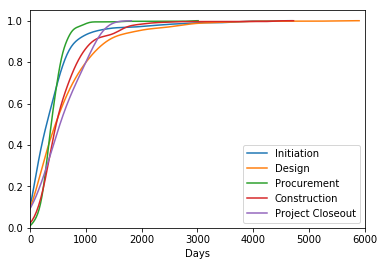

In [10]:
#Compare distribution of phases
dfI = df[['ProjectId','Initiation'] + all_features].dropna(axis=0,how='any')
sns.kdeplot(dfI['Initiation'],cumulative=True).set(xlim=(0, 6000))
dfD = df[['ProjectId','Design'] + all_features].dropna(axis=0,how='any')
sns.kdeplot(dfD['Design'],cumulative=True)
dfP = df[['ProjectId','Procurement'] + all_features].dropna(axis=0,how='any')
sns.kdeplot(dfP['Procurement'],cumulative=True)
dfC = df[['ProjectId','Construction'] + all_features].dropna(axis=0,how='any')
sns.kdeplot(dfC['Construction'],cumulative=True)
dfPC = df[['ProjectId','Project Closeout'] + all_features].dropna(axis=0,how='any')
sns.kdeplot(dfPC['Project Closeout'],cumulative=True)
plt.xlabel('Days')

** Since DDC manages the construction process and since the Construction phase has the second highest mean length of all phases the rest of the analysis will focus on the construction phase. There are 243 projects in the dataset that have a completed construction phase.**

In [11]:
#number of missing values for each feature
print('Missing Values (%)')
n = len(dfC)
for feature in all_features:
    missing = dfC[feature].value_counts()['MissingValue']
    print(feature, round(missing/n,2)*100)

Missing Values (%)
DivisionName 0.0
UnitName 0.0
Borough 59.0
Sponsor 1.0
ProjectType 0.0
Priority 5.0
DesignContractType 7.0
ConstructionContractType 6.0
SourceSystem 0.0
MultipleFMSIds 0.0
DesignFiscalYear 77.0
ConstructionFiscalYear 71.0


** Borough, DesignFiscalYear, and ConstructionFiscalYear have too many missing values in this dataset to be used as features) **

In [12]:
max_C = max(dfC.Construction)
max_C

4385.0

In [13]:
def feature_cum_plot(df,feature,targ):
    feature_values = list(df[feature].unique())
    counts = dfC[feature].value_counts()
    for val in feature_values:
        if counts[val] >=10 and val != 'MissingValue':
            sns.kdeplot(dfC[dfC[feature] == val][targ],cumulative=True,label=val).set(xlim=(0, 4500))
    plt.title(feature)

In [14]:
feature_subset = ['DivisionName','UnitName','Sponsor','ProjectType','Priority', 'DesignContractType',
                 'ConstructionContractType','SourceSystem']

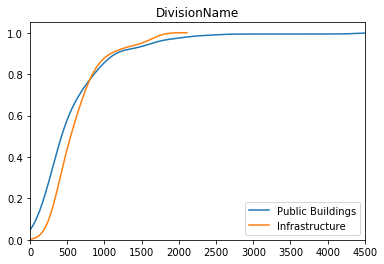

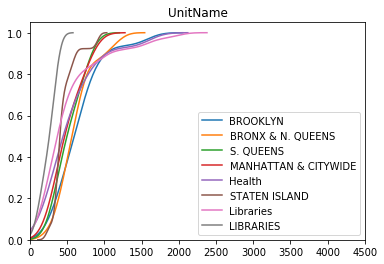

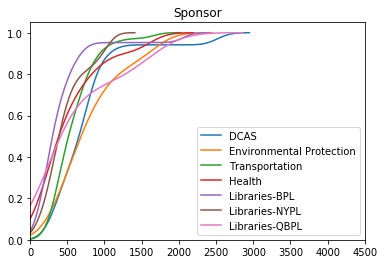

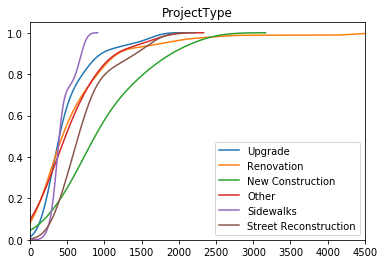

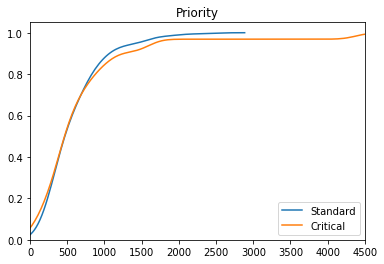

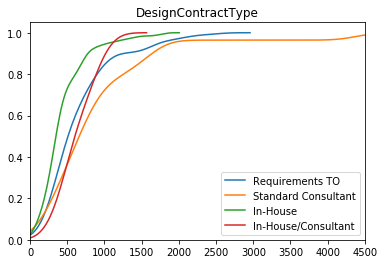

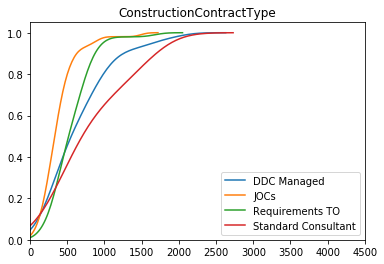

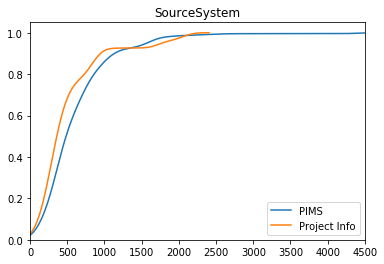

In [15]:
for feature in feature_subset:
    feature_cum_plot(dfC,feature,'Construction')    
    plt.figure()

** possible features (show possible differences in distributions):  
Sponsor, ProjectType, DesignContractType and/or ConstructionContractType, and SourceSystem **  
design and construction contract type might be dependent if using one type of contractor in the design means that the same type is likely to be use in construction  
There seem to be differences in the distributions of time lengths by source system but I'm not sure why this would make a difference - is this correlated with something else?  
  
Thinking about this conceptually it would make sense that the following would influence the project time:  
the project sponsor (part of this may be the types of projects they work on, and part may be something about how the sponsor operates)  
The project type - certain types of projects are likely to take longer than others, the distriutions show that new construction tends to take longer than all other types, while sidewalks are faster.   
The design and/or construction contract type - are projects with outside contracts likely to be longer or shorter, but this may be a result of the types of projects that are given to outside contractors    
  
Many of these things may be a proxy for project complexity - such as more complex projects may be more likely to be contracted out and tend to have longer lengths. certain sponsors may be more or less likely to have more complex projects.  
  
For a first pass at a predictive model I will use Project Type as the first feature to test, and then add other features to see what impact they have.

In [31]:
feature_short_list = ['Sponsor', 'ProjectType', 'DesignContractType','ConstructionContractType','SourceSystem']

# Address Missing Values

In [34]:
#number of missing values for each feature
print('Field /Missing /n /Missing Values (%)')
n = len(dfC)
for feature in feature_short_list:
    missing = dfC[feature].value_counts()['MissingValue']
    print(feature, missing, n, round(missing/n,2)*100)

Field /Missing /n /Missing Values (%)
Sponsor 2 243 1.0
ProjectType 1 243 0.0
DesignContractType 16 243 7.0
ConstructionContractType 14 243 6.0
SourceSystem 0 243 0.0


In [38]:
#number of missing values for each feature
print('Field /Missing /n /Missing Values (%)')
for feature in feature_short_list:
    val_list = list(dfC[feature].unique())
    print(feature,val_list)
    print()

Field /Missing /n /Missing Values (%)
Sponsor ['DCAS', 'Children Services', 'Aging', 'Environmental Protection', 'Corrections', 'Police', 'Fire', 'Homeless Services', 'Transportation', 'HPD', 'Parks & Recreation', 'Health', 'MissingValue', 'Trans. & Env. Protection', 'Libraries-BPL', 'Libraries-NYPL', 'Libraries-QBPL']

ProjectType ['Upgrade', 'Renovation', 'Water', 'New Construction', 'Sewer', 'Other', 'Sidewalks', 'Street Reconstruction', 'Street Resurfacing', 'Ped Ramps', 'MissingValue']

DesignContractType ['Requirements TO', 'Standard Consultant', 'MissingValue', 'In-House', 'In-House/Consultant', 'None', 'JOCS', 'CM-Build', 'DDC Managed/Consultant', 'Requirement Contract', 'DDC Managed', 'Pass Through', 'Design Excellence/24']

ConstructionContractType ['DDC Managed', 'CM-Managed', 'JOCs', 'Requirements TO', 'CM-Build', 'MissingValue', 'DDC Managed/Consultant', 'Individual Contract(s)', 'Pass Through', 'DDC Managed Consultant', 'DEP Managed', 'Requirement Contract', 'JOCS', 'Stan

** Change missing values to:  **  
Sponsor: leave as is, there is not other or unknown category  
ProjectType: change to 'Other'  
DesignContractType and ConstructionContractType: change to 'None'

In [41]:
dfC.loc[dfC.ProjectType == 'MissingValue','ProjectType'] = 'Other'

In [43]:
dfC.loc[dfC.DesignContractType == 'MissingValue','DesignContractType'] = 'None'
dfC.loc[dfC.ConstructionContractType == 'MissingValue','ConstructionContractType'] = 'None'

In [44]:
#Check that missing values have been changed for all except Sponsor
print('Field /Missing /n /Missing Values (%)')
n = len(dfC)
for feature in feature_short_list:
    missing = dfC[feature].value_counts()['MissingValue']
    print(feature, missing, n, round(missing/n,2)*100)

Field /Missing /n /Missing Values (%)
Sponsor 2 243 1.0
ProjectType 0 243 0.0
DesignContractType 0 243 0.0
ConstructionContractType 0 243 0.0
SourceSystem 0 243 0.0


# View summary statistics

In [63]:
#Average, median, and range times by the feature short list

#group complaint data by year, month, borough, precinct, category, 
#description
dfC_sponsor = dfC[['Construction','Sponsor']
           ].groupby(['Sponsor'],as_index=False).agg(['count','mean','median','min','max'])

#reformat headers
dfC_sponsor.columns = ['_'.join(tup).rstrip('_') for tup in dfC_sponsor.columns.values]
dfC_sponsor.reset_index(col_level=1,inplace = True)

In [65]:
#Average, median, and range times by the feature short list

#group complaint data by year, month, borough, precinct, category, 
#description
dfC_ProjectType = dfC[['Construction','ProjectType']
           ].groupby(['ProjectType'],as_index=False).agg(['count','mean','median','min','max'])

#reformat headers
dfC_ProjectType.columns = ['_'.join(tup).rstrip('_') for tup in dfC_ProjectType.columns.values]
dfC_ProjectType.reset_index(col_level=1,inplace = True)

In [64]:
dfC_sponsor.sort_values('Construction_mean',ascending=False)

,Sponsor,Construction_count,Construction_mean,Construction_median,Construction_min,Construction_max
15,Police,1,2182.000000,2182.0,2182.0,2182.0
18,Trans. & Env. Protection,1,1395.000000,1395.0,1395.0,1395.0
7,Fire,7,1311.428571,844.0,387.0,4385.0
8,HPD,3,1057.666667,1575.0,23.0,1575.0
6,Environmental Protection,19,781.684211,659.0,242.0,1757.0
0,Aging,1,750.000000,750.0,750.0,750.0
3,DCAS,17,728.882353,728.0,241.0,2520.0
2,Corrections,3,676.333333,800.0,209.0,1020.0
13,Libraries-QBPL,25,599.040000,334.0,57.0,1935.0
19,Transportation,71,571.281690,503.0,162.0,1684.0


In [66]:
dfC_ProjectType.sort_values('Construction_mean',ascending=False)

,ProjectType,Construction_count,Construction_mean,Construction_median,Construction_min,Construction_max
1,New Construction,11,964.090909,833.0,209.0,2182.0
5,Sewer,4,960.750000,901.5,364.0,1676.0
8,Street Reconstruction,32,736.375000,660.0,228.0,1757.0
4,Renovation,82,589.548780,400.0,14.0,4385.0
11,Water,9,578.555556,466.0,242.0,1187.0
2,Other,15,537.133333,490.0,81.0,1634.0
3,Ped Ramps,7,527.571429,498.0,235.0,907.0
10,Upgrade,57,493.473684,370.0,91.0,1732.0
9,Street Resurfacing,7,488.285714,470.0,263.0,729.0
6,Sidewalks,19,436.421053,364.0,220.0,715.0


In [67]:
#Average, median, and range times by the feature short list

#group complaint data by year, month, borough, precinct, category, 
#description
dfC_agg = dfC[['Construction','ProjectType','Sponsor']
           ].groupby(['ProjectType','Sponsor'],as_index=False).agg(['count','mean','median','min','max'])

#reformat headers
dfC_agg.columns = ['_'.join(tup).rstrip('_') for tup in dfC_agg.columns.values]
dfC_agg.reset_index(col_level=1,inplace = True)

In [62]:
dfC_agg.sort_values('Construction_mean',ascending=False)

,ProjectType,Sponsor,Construction_count,Construction_mean,Construction_min,Construction_max
6,New Construction,Police,1,2182.000000,2182.0,2182.0
18,Renovation,Fire,3,2101.666667,835.0,4385.0
30,Street Reconstruction,Environmental Protection,1,1757.000000,1757.0,1757.0
5,New Construction,Libraries-QBPL,1,1585.000000,1585.0,1585.0
31,Street Reconstruction,HPD,2,1575.000000,1575.0,1575.0
32,Street Reconstruction,Trans. & Env. Protection,1,1395.000000,1395.0,1395.0
2,New Construction,Environmental Protection,2,1098.000000,659.0,1537.0
26,Renovation,Transportation,3,1015.666667,400.0,1684.0
28,Sewer,Environmental Protection,4,960.750000,364.0,1676.0
16,Renovation,Corrections,2,910.000000,800.0,1020.0


# One Hot Encode Categorical variables for modeling

In [46]:
#turn categorical variables into dummy variables (one column for each value of the categorical variable with 0 or 1
dfC_dummies = pd.get_dummies(dfC, 
                   prefix=['Sponsor', 'ProjectType', 'DesignContractType','ConstructionContractType','SourceSystem'],
              columns = ['Sponsor', 'ProjectType', 'DesignContractType','ConstructionContractType','SourceSystem'])


In [48]:
dfC_dummies.head()

,ProjectId,Construction,DivisionName,UnitName,Borough,Priority,MultipleFMSIds,DesignFiscalYear,ConstructionFiscalYear,Sponsor_Aging,...,ConstructionContractType_None,ConstructionContractType_Pass Through,ConstructionContractType_Requirement Contract,ConstructionContractType_Requirements TO,ConstructionContractType_Standard Consultant,ConstructionContractType_Standard Design/Const.,ConstructionContractType_MissingValue,SourceSystem_PIMS,SourceSystem_Project Info,SourceSystem_MissingValue
0,ACEDOS501,241.0,Public Buildings,ONENYC,Unknown,Standard,FALSE,MissingValue,MissingValue,0,...,0,0,0,0,0,0,0,1,0,0
4,ACSLSPCAR,400.0,Public Buildings,CORRECTIONS,Brooklyn,Emergency,FALSE,MissingValue,MissingValue,0,...,0,0,0,0,0,0,0,1,0,0
6,AGCOVELLO,750.0,Public Buildings,Human Services,MissingValue,Standard,FALSE,MissingValue,MissingValue,1,...,0,0,0,0,0,0,0,1,0,0
13,BEDA001,728.0,Infrastructure,BROOKLYN,Brooklyn,Critical,FALSE,2015,2016,0,...,0,0,0,1,0,0,0,1,0,0
17,C114NEWRIP1,209.0,Public Buildings,Corrections,MissingValue,Standard,FALSE,MissingValue,MissingValue,0,...,0,0,0,0,0,0,0,0,1,0


In [47]:
list(dfC_dummies)

['ProjectId',
 'Construction',
 'DivisionName',
 'UnitName',
 'Borough',
 'Priority',
 'MultipleFMSIds',
 'DesignFiscalYear',
 'ConstructionFiscalYear',
 'Sponsor_Aging',
 'Sponsor_Children Services',
 'Sponsor_Corrections',
 'Sponsor_DCAS',
 'Sponsor_Education',
 'Sponsor_Emergency Management',
 'Sponsor_Environmental Protection',
 'Sponsor_Fire',
 'Sponsor_HPD',
 'Sponsor_Health',
 'Sponsor_Homeless Services',
 'Sponsor_Libraries-BPL',
 'Sponsor_Libraries-NYPL',
 'Sponsor_Libraries-QBPL',
 'Sponsor_Parks & Recreation',
 'Sponsor_Police',
 'Sponsor_Sanitation',
 'Sponsor_SocialServices-HRA',
 'Sponsor_Trans. & Env. Protection',
 'Sponsor_Transportation',
 'Sponsor_Unknown',
 'Sponsor_MissingValue',
 'ProjectType_Feasibility Study',
 'ProjectType_New Construction',
 'ProjectType_Other',
 'ProjectType_Ped Ramps',
 'ProjectType_Renovation',
 'ProjectType_Sewer',
 'ProjectType_Sidewalks',
 'ProjectType_Street',
 'ProjectType_Street Reconstruction',
 'ProjectType_Street Resurfacing',
 'Pro

# Output modeling file to a dataframe

In [50]:
#output df_SP to a file
dfC_dummies.to_pickle('DDC_model_data.pkl')